<a href="https://colab.research.google.com/github/rkgupta7463/ML-projects-code/blob/main/fakenewsclassifiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

Below Three lines of code will run only one time

In [10]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

In [11]:
# !kaggle datasets download -d algord/fake-news

In [12]:
# import zipfile
# zip = zipfile.ZipFile("/content/fake-news.zip",'r')
# zip.extractall("/content")
# zip.close()

In [13]:
df=pd.read_csv('FakeNewsNet.csv')

In [14]:
df.shape

(23196, 5)

In [15]:
df.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [16]:
df.isnull().sum()

title              0
news_url         330
source_domain    330
tweet_num          0
real               0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          23196 non-null  object
 1   news_url       22866 non-null  object
 2   source_domain  22866 non-null  object
 3   tweet_num      23196 non-null  int64 
 4   real           23196 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 906.2+ KB


**Data Visualizing & Feature Engineering**

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import  CountVectorizer,TfidfVectorizer,HashingVectorizer
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re
nltk.download('stopwords')
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
df['real'].unique()

array([1, 0])

In [20]:
top_source_domains=df['source_domain'].sort_values(ascending=False).unique()[:15]

In [21]:
df['real'].value_counts()

1    17441
0     5755
Name: real, dtype: int64

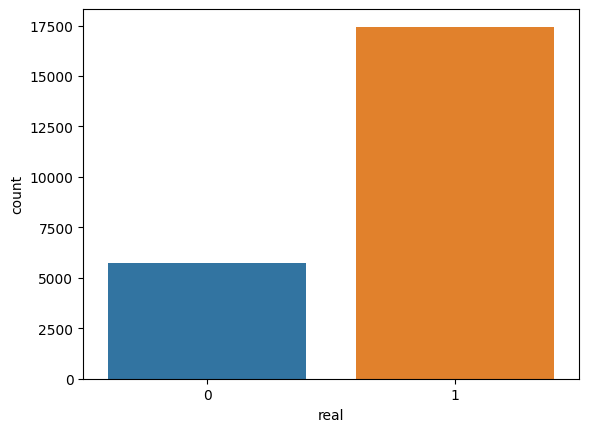

In [22]:
# Plotting the countplot
sns.countplot(x='real', data=df)

# Display the plot
plt.show()

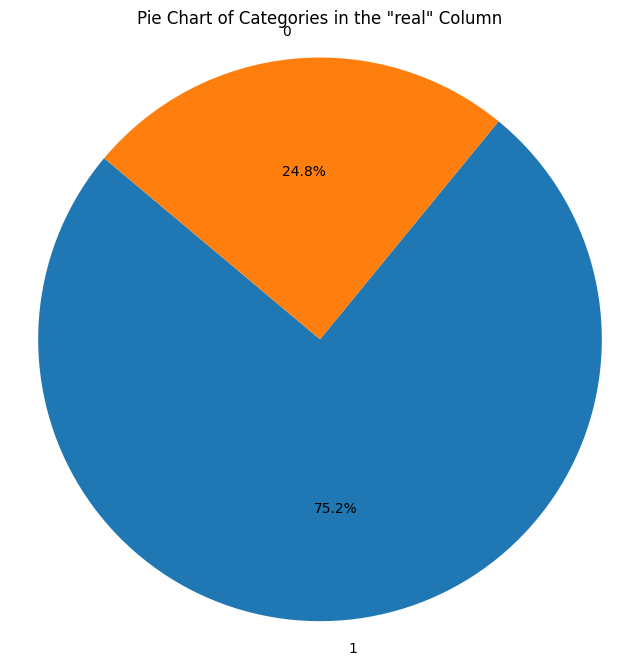

In [23]:
# Count the occurrences of each category in the 'real' column
category_counts = df['real'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Pie Chart of Categories in the "real" Column')

# Equal aspect ratio ensures that the pie chart is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()

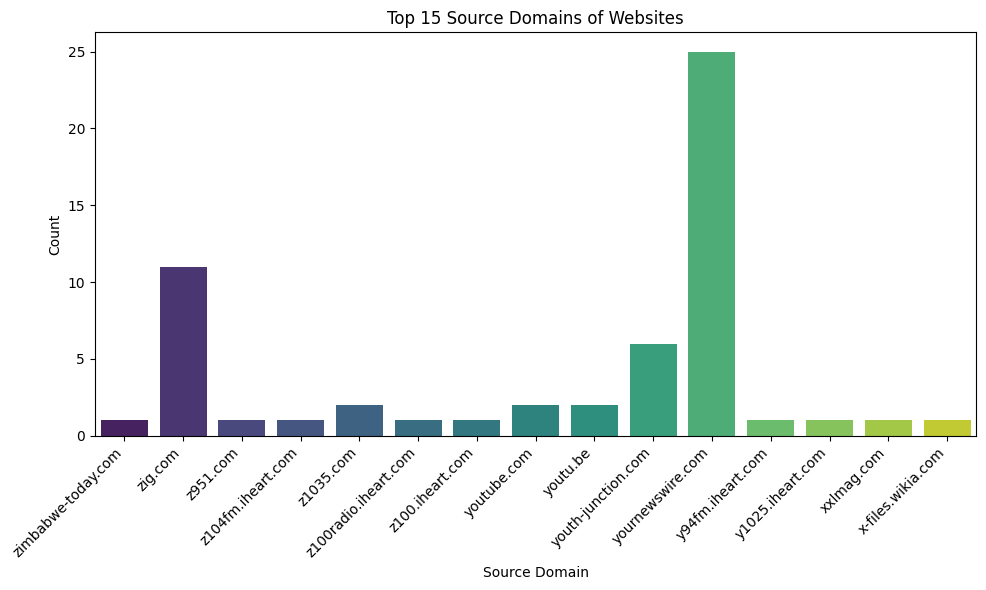

In [24]:
# Filter the DataFrame to include only the top source domains
filtered_df = df[df['source_domain'].isin(top_source_domains)]

# Create a barplot
plt.figure(figsize=(10, 6))
sns.countplot(x='source_domain', data=filtered_df, order=top_source_domains, palette='viridis')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Source Domain')
plt.ylabel('Count')
plt.title('Top 15 Source Domains of Websites')

# Display the plot
plt.tight_layout()
plt.show()

In [25]:
top_tweet_num=df['tweet_num'].sort_values(ascending=False).unique()[:15]

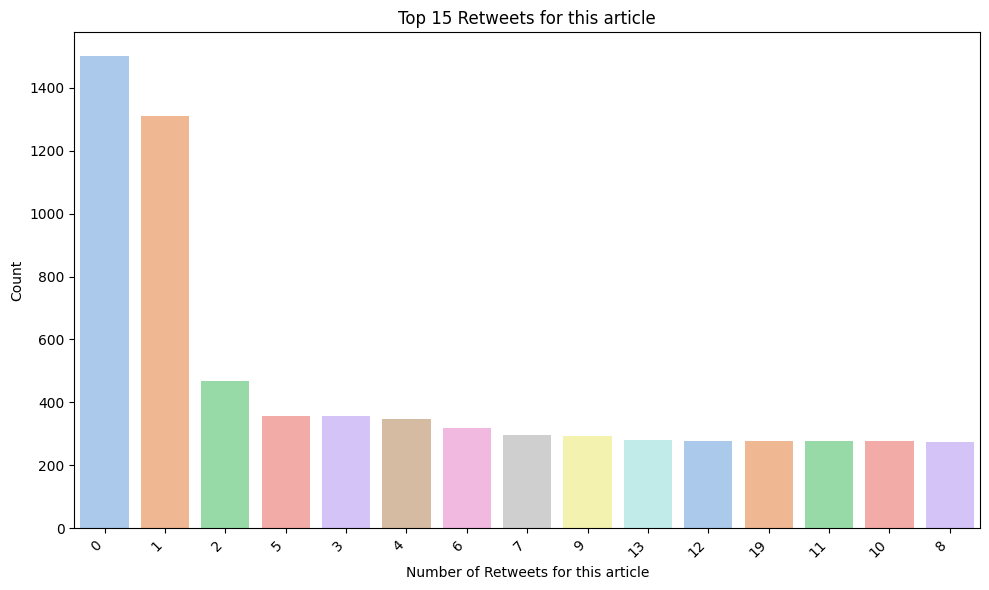

In [26]:
# List of top 15 tweet numbers based on retweet count
top_tweet_num = df['tweet_num'].value_counts().nlargest(15).index

# Filter the DataFrame to include only the top tweet numbers
filtered_df = df[df['tweet_num'].isin(top_tweet_num)]

# Define a different color palette for the barplot
custom_palette = sns.color_palette("pastel")

# Create a barplot
plt.figure(figsize=(10, 6))
sns.countplot(x='tweet_num', data=filtered_df, order=top_tweet_num, palette=custom_palette)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Number of Retweets for this article')
plt.ylabel('Count')
plt.title('Top 15 Retweets for this article')

# Display the plot
plt.tight_layout()
plt.show()

In [27]:
# df['title'].iloc[1299]
dummy_df=df[['title','real']]

In [28]:
## Text preprocessing
corpus=[]
for i in range(0,len(dummy_df['title'])):
    reviews=re.sub('[^a-zA-Z]',' ',dummy_df['title'][i])
    reviews=reviews.lower()
    reviews=reviews.split()

    reviews=[ps.stem(word) for word in reviews if not word in stopwords.words('english')]
    reviews=' '.join(reviews)
    corpus.append(reviews)

In [29]:
reviews

'kelli clarkson perform medley kendrick lamar humbl hit billboard music award'

In [30]:
reviews

'kelli clarkson perform medley kendrick lamar humbl hit billboard music award'

In [31]:
corpus[529]

'meghan markl princ harri wed drama faq gossip realli want know'

In [32]:
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))
X=cv.fit_transform(corpus).toarray()

In [33]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [34]:
X.shape

(23196, 5000)

In [35]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [36]:
cv.get_feature_names_out()[:20]

array(['aaron', 'aaron carter', 'aaron rodger', 'ab', 'abbey', 'abbi',
       'abbi lee', 'abbi lee miller', 'abc', 'abc news', 'abl', 'abraham',
       'absolut', 'abus', 'academi', 'academi award', 'accept',
       'accept speech', 'access', 'accessori'], dtype=object)

In [37]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [38]:
count_df=pd.DataFrame(X,columns=cv.get_feature_names_out())

In [39]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [40]:
count_df.sample(10)

aaron  aaron carter  aaron rodger  ab  abbey  abbi  abbi lee  \
11792      0             0             0   0      0     0         0   
7152       0             0             0   0      0     0         0   
10489      0             0             0   0      0     0         0   
19321      0             0             0   0      0     0         0   
809        0             0             0   0      0     0         0   
17377      0             0             0   0      0     0         0   
18402      0             0             0   0      0     0         0   
12983      0             0             0   0      0     0         0   
3268       0             0             0   0      0     0         0   
11307      0             0             0   0      0     0         0   

       abbi lee miller  abc  abc news  abl  abraham  absolut  abus  academi  \
11792                0    0         0    0        0        0     0        0   
7152                 0    0         0    0        0        0     0        0   
10489                0    0         0    0        0        0     0        0   
19321                0    0         0    0        0        0     0        0   
809                  0    0         0    0        0        0     0        0   
17377                0    0         0    0        0        0     0        0   
18402                0    0         0    0        0        0     0        0   
12983                0    0         0    0        0        0     0        0   
3268                 0    0         0    0        0        0     0        0   
11307                0    0         0    0        0        0     0        0   

       academi award  accept  accept speech  access  accessori  accid  \
11792              0       0              0       0          0      0   
7152               0       0              0       0          0      0   
10489              0       0              0       0          0      0   
19321              0       0              0       0          0      0   
809                0       0              0       0          0      0   
17377              0       0              0       0          0      0   
18402              0       0              0       0          0      0   
12983              0       0              0       0          0      0   
3268               0       0              0       0          0      0   
11307              0       0              0       0          0      0   

       accident  accord  account  accur  accus  accus sexual  ace  achiev  \
11792         0       0        0      0      0             0    0       0   
7152          0       0        0      0      0             0    0       0   
10489         0       0        0      0      0             0    0       0   
19321         0       0        0      0      0             0    0       0   
809           0       0        0      0      0             0    0       0   
17377         0       0        0      0      0             0    0       0   
18402         0       0        0      0      0             0    0       0   
12983         0       0        0      0      0             0    0       0   
3268          0       0        0      0      0             0    0       0   
11307         0       0        0      0      0             0    0       0   

       acm  acm award  acn  across  act  action  actor  actress  actual  ad  \
11792    0          0    0       0    0       0      0        0       0   0   
7152     0          0    0       0    0       0      0        0       0   0   
10489    0          0    0       0    0       0      0        0       0   0   
19321    0          0    0       0    0       0      0        0       0   0   
809      0          0    0       0    0       0      0        0       0   0   
17377    0          0    0       0    0       0      0        0       0   0   
18402    0          0    0       0    0       0      0        0       0   0   
12983    0          0    0       0    0       0      0        0       0

In [41]:
## As we shaw in count_df that in column of accus is present 1 in row no. 795. and finally it's also present in corpus
corpus[795]

'rhoc husband jim edmond slam kelli dodd mistress accus'

In [42]:
y=dummy_df['real']

In [43]:
y.shape

(23196,)

In [44]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix,RocCurveDisplay,roc_auc_score,roc_curve,classification_report

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [46]:
##importing the models
from sklearn.naive_bayes import MultinomialNB

In [47]:
mnb=MultinomialNB()

In [48]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [49]:
y_pred_mnb=mnb.predict(X_test)

In [50]:
accuracy_score(y_test,y_pred_mnb)*100

81.37663457393303

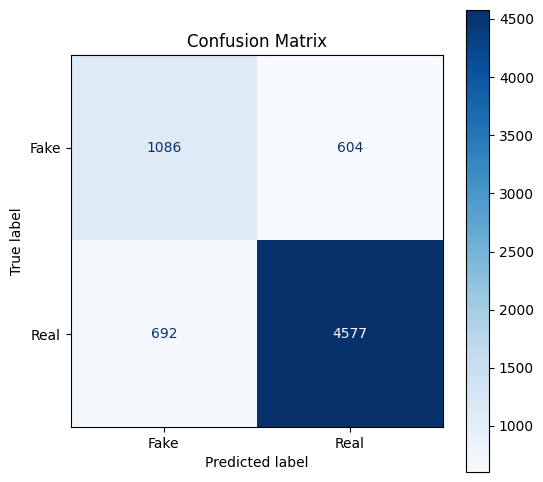

In [51]:

# Define the class labels
class_labels = ['Fake', 'Real']

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_mnb)

# Create the ConfusionMatrixDisplay with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Plot the confusion matrix with the custom labels
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Add a title
plt.title('Confusion Matrix')

# Display the plot
plt.show()

<Figure size 800x600 with 0 Axes>

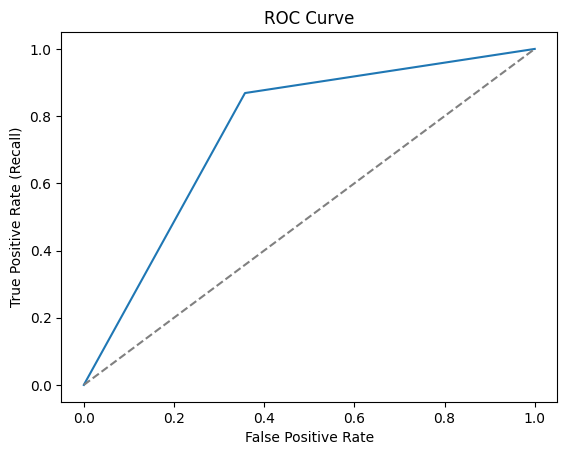

In [52]:
# Calculate the ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_mnb)

# Create the ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
roc_display.plot()

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')

# Plot the diagonal 50% line for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Show the plot
plt.show()

In [53]:
print(classification_report(y_test,y_pred_mnb))

              precision    recall  f1-score   support

           0       0.61      0.64      0.63      1690
           1       0.88      0.87      0.88      5269

    accuracy                           0.81      6959
   macro avg       0.75      0.76      0.75      6959
weighted avg       0.82      0.81      0.82      6959



**Passive Aggressive Classifier Algorithms**

In [54]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf=PassiveAggressiveClassifier(n_iter_no_change=50)

In [55]:
linear_clf.fit(X_train,y_train)

PassiveAggressiveClassifier(n_iter_no_change=50)

In [56]:
y_pred_lclf=linear_clf.predict(X_test)

In [57]:
accuracy_score(y_test,y_pred_lclf)*100

79.01997413421469

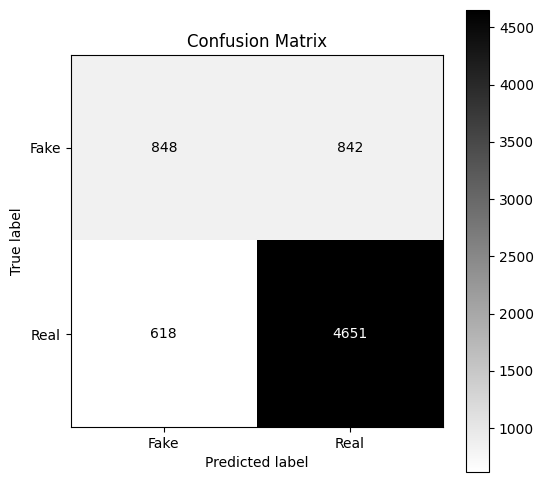

In [58]:

# Define the class labels
class_labels = ['Fake', 'Real']

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_lclf)

# Create the ConfusionMatrixDisplay with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Plot the confusion matrix with the custom labels
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap=plt.cm.binary, ax=ax)

# Add a title
plt.title('Confusion Matrix')

# Display the plot
plt.show()

<Figure size 800x600 with 0 Axes>

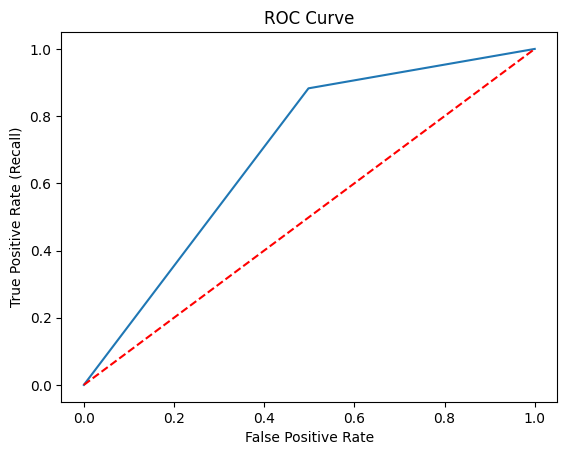

In [59]:
# Calculate the ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lclf)

# Create the ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
roc_display.plot()

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')

# Plot the diagonal 50% line for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='red')

# Show the plot
plt.show()

In [60]:
print(classification_report(y_test,y_pred_lclf))

              precision    recall  f1-score   support

           0       0.58      0.50      0.54      1690
           1       0.85      0.88      0.86      5269

    accuracy                           0.79      6959
   macro avg       0.71      0.69      0.70      6959
weighted avg       0.78      0.79      0.78      6959



**Hyper Tuning with Both Algorithms**

In [61]:
!pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 27.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1


In [62]:
# Set up the grid of hyperparameters to search
param_grid = {
    'multinomialnb__alpha': [0.1, 0.5, 1.0, 1.5, 2.0]
}

In [63]:
from sklearn.pipeline import make_pipeline
# Create a pipeline with the MultinomialNB classifier
mnb = MultinomialNB()

In [64]:
mnb.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

In [65]:
# Set up the grid of hyperparameters to search
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]
}

# Perform GridSearchCV
grid = GridSearchCV(mnb, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]})

In [66]:
#Access the best hyperparameters and the tuned model
best_alpha = grid.best_params_['alpha']
best_model = grid.best_estimator_
best_score = grid.best_score_

In [67]:
# Predict using the tuned model
y_pred_mnbg = best_model.predict(X_test)

In [68]:
print("Best Alpha Value :- ",best_alpha)
print("Best Alpha Value :- ",best_model)
print("Best Score Value :- ",best_score*100)

Best Alpha Value :-  0.1
Best Alpha Value :-  MultinomialNB(alpha=0.1)
Best Score Value :-  82.42289965272984


**Solving with ANNs and RNNs**

In [96]:
import tensorflow
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras import losses
import matplotlib.pyplot as plt

Implementing ANN Model

In [94]:
X_train.shape

(16237, 5000)

In [117]:
from tensorflow.keras.regularizers import l2

# Create the ANN model
model_A = Sequential()
model_A.add(Dense(128, activation='relu', input_dim=5000, kernel_regularizer=l2(0.001)))
model_A.add(BatchNormalization())
model_A.add(Dropout(0.6))

model_A.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model_A.add(BatchNormalization())
model_A.add(Dropout(0.6))

model_A.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model_A.add(BatchNormalization())
model_A.add(Dropout(0.6))

model_A.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model_A.add(BatchNormalization())
model_A.add(Dropout(0.6))

model_A.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
model_A.add(BatchNormalization())
model_A.add(Dropout(0.6))

model_A.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_A.compile(loss=losses.binary_crossentropy, optimizer=optimizer, metrics=['accuracy'])

# Train the model with Early Stopping and ReduceLROnPlateau callbacks
early_stopping = EarlyStopping(patience=5, monitor='val_loss', min_delta=0.009, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=2)

history1 = model_A.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test set
loss, accuracy = model_A.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/50
508/508 [==============================] - 11s 16ms/step - loss: 2.3277 - accuracy: 0.6044 - val_loss: 1.8719 - val_accuracy: 0.7571 - lr: 0.0010
Epoch 2/50
508/508 [==============================] - 7s 15ms/step - loss: 1.7453 - accuracy: 0.7213 - val_loss: 1.4618 - val_accuracy: 0.7571 - lr: 0.0010
Epoch 3/50
508/508 [==============================] - 8s 16ms/step - loss: 1.3145 - accuracy: 0.7453 - val_loss: 1.1187 - val_accuracy: 0.7571 - lr: 0.0010
Epoch 4/50
508/508 [==============================] - 7s 13ms/step - loss: 1.0134 - accuracy: 0.7512 - val_loss: 0.8737 - val_accuracy: 0.7590 - lr: 0.0010
Epoch 5/50
508/508 [==============================] - 9s 17ms/step - loss: 0.8065 - accuracy: 0.7674 - val_loss: 0.6963 - val_accuracy: 0.8024 - lr: 0.0010
Epoch 6/50
508/508 [==============================] - 8s 15ms/step - loss: 0.6791 - accuracy: 0.7926 - val_loss: 0.6226 - val_accuracy: 0.8263 - lr: 0.0010
Epoch 7/50
508/508 [==============================] - 9s 17ms/s

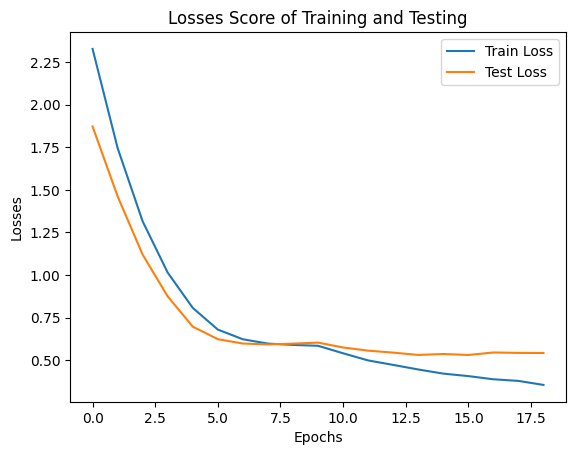

In [118]:
plt.plot(history1.history['loss'],label="Train Loss")
plt.plot(history1.history['val_loss'],label="Test Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Losses Score of Training and Testing")
plt.show()

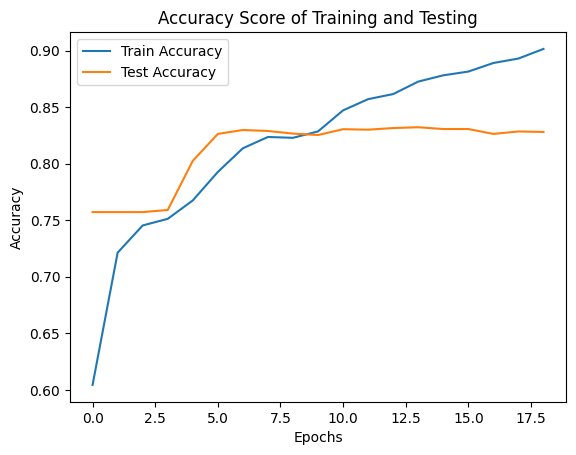

In [119]:
plt.plot(history1.history['accuracy'],label="Train Accuracy")
plt.plot(history1.history['val_accuracy'],label="Test Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Score of Training and Testing")
plt.show()

In [120]:
y_pred_ann=model_A.predict(X_test)

218/218 [==============================] - 1s 5ms/step


In [121]:
threshold = 0.5  # You can adjust this threshold based on your problem's needs

# Convert probabilities to binary labels
y_pred_binary_A = (y_pred_ann >= threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary_A)
print("Accuracy:", accuracy*100)

Accuracy: 83.21597930737174


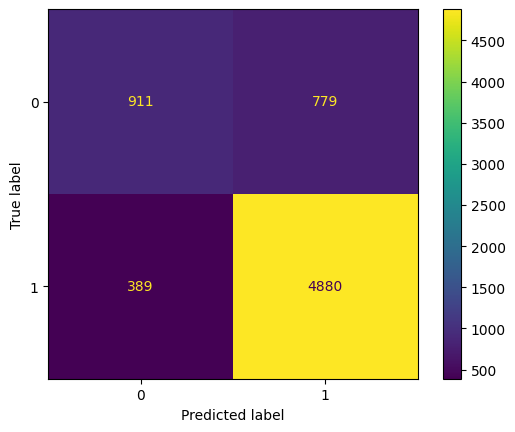

In [122]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_binary_A)).plot()

<Figure size 800x600 with 0 Axes>

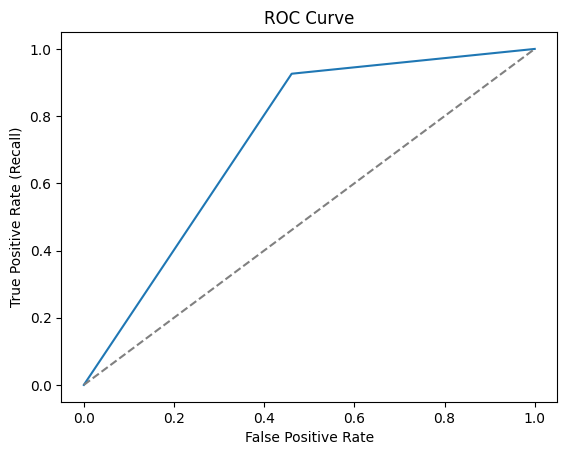

In [123]:
# Calculate the ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary_A)

# Create the ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
roc_display.plot()

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')

# Plot the diagonal 50% line for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Show the plot
plt.show()

In [124]:
print(classification_report(y_test,y_pred_binary_A))

              precision    recall  f1-score   support

           0       0.70      0.54      0.61      1690
           1       0.86      0.93      0.89      5269

    accuracy                           0.83      6959
   macro avg       0.78      0.73      0.75      6959
weighted avg       0.82      0.83      0.82      6959



### **LSTM Model**
**One Hot Representation**

In [89]:
## Vocabulary Size
voc_size=5000

In [125]:
message=dummy_df.copy()

In [126]:
message.head()

,title,real
0,Kandi Burruss Explodes Over Rape Accusation on...,1
1,People's Choice Awards 2018: The best red carp...,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,1
3,Colombian singer Maluma sparks rumours of inap...,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,1


In [127]:
## Text preprocessing
corpus_1=[]
for i in range(0,len(message['title'])):
    reviews=re.sub('[^a-zA-Z]',' ',message['title'][i])
    reviews=reviews.lower()
    reviews=reviews.split()

    reviews=[ps.stem(word) for word in reviews if not word in stopwords.words('english')]
    reviews=' '.join(reviews)
    corpus_1.append(reviews)

In [128]:
onehot_repr=[one_hot(words, voc_size) for words in corpus_1]

In [129]:
onehot_repr[:10]

[[3646, 2970, 3878, 3853, 2191, 879, 1681, 4337, 798, 3223],
 [1276, 4357, 4079, 2720, 1201, 3883, 2909],
 [819,
  1087,
  1509,
  2694,
  1272,
  2536,
  425,
  1172,
  2344,
  4520,
  1861,
  85,
  2992,
  4640,
  4134],
 [3816, 4915, 3962, 4207, 2588, 884, 4570, 3455],
 [1173, 3672, 1996, 1495, 4263, 737, 663, 2533, 502, 4916, 1651, 3974, 3309],
 [1229, 1776, 3389, 2190, 3972, 3671, 4673, 1100, 1634],
 [2954, 2253, 2036, 4431, 3539, 3904],
 [2370, 300, 1771, 4759, 179, 2091, 4270, 2655, 368, 146],
 [1592, 1743, 15, 2043, 589, 1975, 671, 1661, 343, 482, 4520, 1861],
 [2981, 4167, 4336, 1751, 3545, 270]]

In [130]:
sent_lenght=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_lenght)
print(embedded_docs)

[[   0    0    0 ... 4337  798 3223]
 [   0    0    0 ... 1201 3883 2909]
 [   0    0    0 ... 2992 4640 4134]
 ...
 [   0    0    0 ... 4123 4203 1047]
 [   0    0    0 ... 4906 2169 1634]
 [   0    0    0 ...    3 2286 4079]]


In [131]:
len(embedded_docs)

23196

In [140]:
embedded_vector_features = 40

model = Sequential()
model.add(Embedding(voc_size, embedded_vector_features, input_length=sent_lenght))
model.add(LSTM(100, recurrent_dropout=0.2))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Adding dropout after LSTM

model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Print the summary of LSTM model
print(model.summary())

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            200000    
                                                                 
 lstm_1 (LSTM)               (None, 100)               56400     
                                                                 
 batch_normalization_35 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 dropout_34 (Dropout)        (None, 100)               0         
                                                                 
 dense_68 (Dense)            (None, 1)                 101       
                                                                 
Total params: 256,901
Trainable params: 256,701
Non-trainable params: 200
_____________________________________________

In [133]:
len(embedded_docs),y.shape

(23196, (23196,))

In [134]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [135]:
X_final.shape,y_final.shape

((23196, 20), (23196,))

In [136]:
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,test_size=0.3,random_state=42)

In [141]:
## Finally training our LSTM Model
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=100)

Epoch 1/10
163/163 [==============================] - 16s 81ms/step - loss: 0.4836 - accuracy: 0.7762 - val_loss: 0.5292 - val_accuracy: 0.7571
Epoch 2/10
163/163 [==============================] - 15s 90ms/step - loss: 0.3503 - accuracy: 0.8520 - val_loss: 0.5327 - val_accuracy: 0.7571
Epoch 3/10
163/163 [==============================] - 13s 79ms/step - loss: 0.3001 - accuracy: 0.8759 - val_loss: 0.4830 - val_accuracy: 0.7741
Epoch 4/10
163/163 [==============================] - 13s 79ms/step - loss: 0.2644 - accuracy: 0.8919 - val_loss: 0.4615 - val_accuracy: 0.8123
Epoch 5/10
163/163 [==============================] - 13s 79ms/step - loss: 0.2363 - accuracy: 0.9049 - val_loss: 0.5317 - val_accuracy: 0.8076
Epoch 6/10
163/163 [==============================] - 13s 79ms/step - loss: 0.2103 - accuracy: 0.9153 - val_loss: 0.6613 - val_accuracy: 0.7620
Epoch 7/10
163/163 [==============================] - 13s 79ms/step - loss: 0.1883 - accuracy: 0.9248 - val_loss: 0.7360 - val_accuracy:

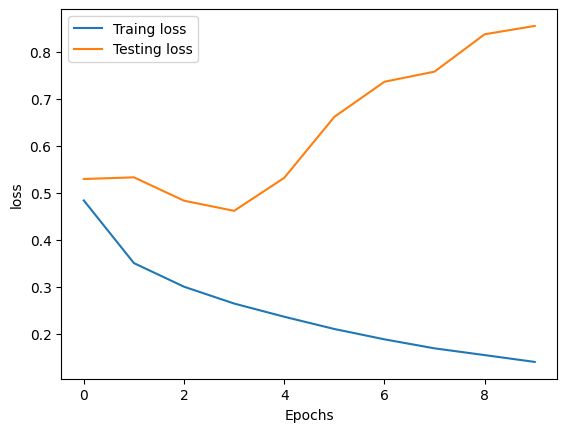

In [142]:
plt.plot(history.history['loss'],label="Traing loss")
plt.plot(history.history['val_loss'],label="Testing loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.show()

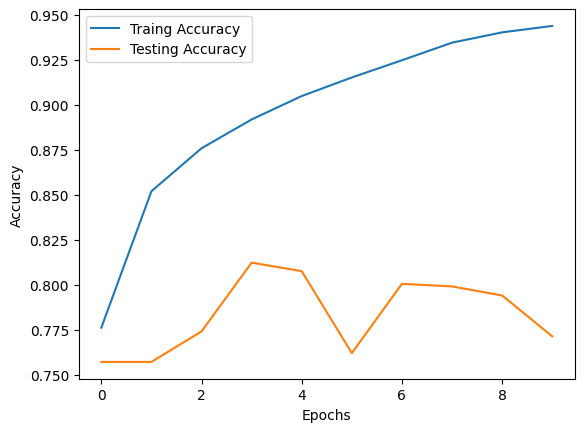

In [143]:
plt.plot(history.history['accuracy'],label="Traing Accuracy")
plt.plot(history.history['val_accuracy'],label="Testing Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [144]:
y_pred_lstm=model.predict(X_test)
len(y_pred_lstm)

218/218 [==============================] - 2s 8ms/step


6959

In [145]:
len(y_test)

6959

In [146]:
threshold = 0.5  # You can adjust this threshold based on your problem's needs

# Convert probabilities to binary labels
y_pred_binary = (y_pred_lstm >= threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

Accuracy: 0.77137519758586


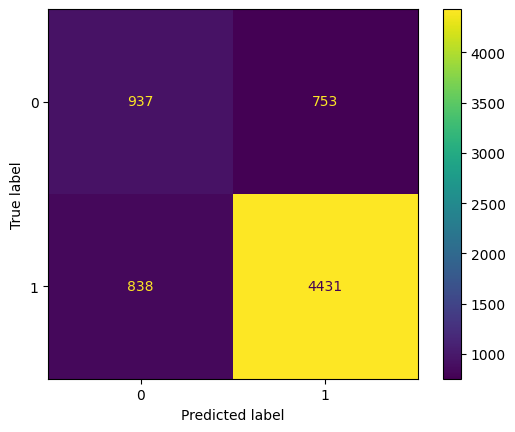

In [147]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_binary)).plot()

<Figure size 800x600 with 0 Axes>

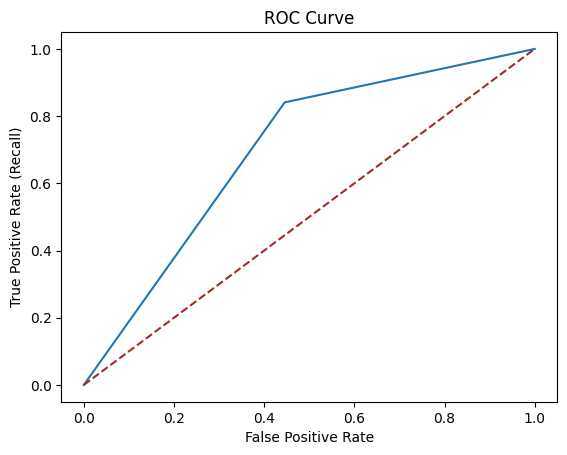

In [150]:
# Calculate the ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)

# Create the ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
roc_display.plot()

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')

# Plot the diagonal 50% line for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='brown')

# Show the plot
plt.show()

In [152]:
from tensorflow.keras.constraints import max_norm

In [164]:
model2 = Sequential()

model2 = Sequential()
model2.add(Embedding(voc_size, embedded_vector_features, input_length=sent_lenght))
model2.add(Dropout(0.8))
model2.add(LSTM(50, kernel_constraint=max_norm(3), recurrent_constraint=max_norm(3), kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01)))
model2.add(Dropout(0.8))
model2.add(BatchNormalization())  # Adding batch normalization

model2.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate and gradient clipping
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0)
model2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Print the summary of LSTM model
print(model2.summary())

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 20, 40)            200000    
                                                                 
 dropout_44 (Dropout)        (None, 20, 40)            0         
                                                                 
 lstm_6 (LSTM)               (None, 50)                18200     
                                                                 
 dropout_45 (Dropout)        (None, 50)                0         
                                                                 
 batch_normalization_39 (Bat  (None, 50)               200       
 chNormalization)                                                
                                                                 
 dense_73 (Dense)            (None, 1)                 51        
                                                     

In [165]:
# Add Early Stopping and ReduceLROnPlateau callbacks
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=2)

# Train the model with larger batch size
batch_size = 64
epochs = 50

history2 = model2.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test,y_test), callbacks=[early_stopping, reduce_lr])

Epoch 1/50
254/254 [==============================] - 10s 25ms/step - loss: 0.9126 - accuracy: 0.6843 - val_loss: 0.6104 - val_accuracy: 0.7571 - lr: 0.0010
Epoch 2/50
254/254 [==============================] - 7s 28ms/step - loss: 0.5131 - accuracy: 0.7996 - val_loss: 0.4984 - val_accuracy: 0.7754 - lr: 0.0010
Epoch 3/50
254/254 [==============================] - 6s 23ms/step - loss: 0.4436 - accuracy: 0.8188 - val_loss: 0.4440 - val_accuracy: 0.8087 - lr: 0.0010
Epoch 4/50
254/254 [==============================] - 7s 29ms/step - loss: 0.4091 - accuracy: 0.8313 - val_loss: 0.4269 - val_accuracy: 0.8228 - lr: 0.0010
Epoch 5/50
254/254 [==============================] - 6s 23ms/step - loss: 0.3962 - accuracy: 0.8374 - val_loss: 0.4245 - val_accuracy: 0.8230 - lr: 0.0010
Epoch 6/50
254/254 [==============================] - 7s 28ms/step - loss: 0.3791 - accuracy: 0.8441 - val_loss: 0.4484 - val_accuracy: 0.8169 - lr: 0.0010
Epoch 7/50
254/254 [==============================] - 6s 23ms/s

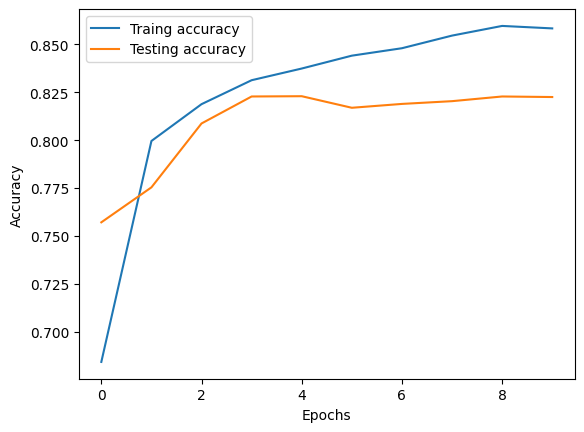

In [166]:
plt.plot(history2.history['accuracy'],label="Traing accuracy")
plt.plot(history2.history['val_accuracy'],label="Testing accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [169]:
y_pred_lstm2=model2.predict(X_test)
len(y_pred_lstm2)

218/218 [==============================] - 2s 9ms/step


6959

In [170]:
threshold = 0.5  # You can adjust this threshold based on your problem's needs

# Convert probabilities to binary labels
y_pred_binary1 = (y_pred_lstm2 >= threshold).astype(int)

accuracy1 = accuracy_score(y_test, y_pred_binary1)
print("Accuracy:", accuracy1)

Accuracy: 0.822963069406524


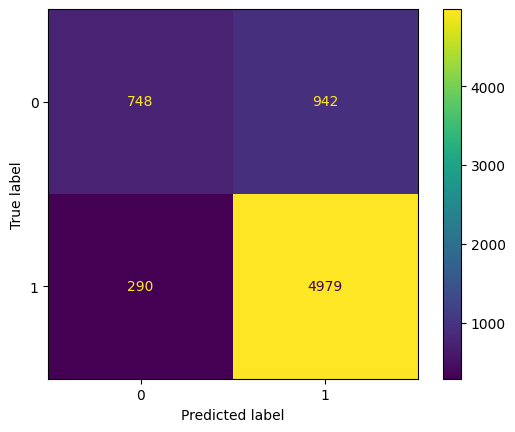

In [173]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_binary1)).plot()

### **Thanks All Connections**